## Project Goal: Predict number of bikers on a given day using linear regression

The dataset about Seattle's Fremont Bridge in the form of a csv file.
The data contains different details about a given day, like weather, temperature and other factors (see the dataframe preview below) for more details. The data also contains how many bikers were observed crossing the brudge that day.


The Project is to train a linear regression model which takes in the parameters of the day and predicts the number of bikers according to those parameters.

In [ ]:
from IPython.display import clear_output

In [ ]:
%pip install gdown==4.5

clear_output()

In [ ]:
# Download the CSV file.
!gdown 1_eJU8Y-31_l0oq1sSJT6pROJyo-ufuvD

Downloading...
From: https://drive.google.com/uc?id=1_eJU8Y-31_l0oq1sSJT6pROJyo-ufuvD
To: /content/bikers_data.csv
100% 213k/213k [00:00<00:00, 107MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_df = pd.read_csv('bikers_data.csv') # reed the data

### prepare the data

In [ ]:
data_df = data_df.drop('Date',axis=1) # drop unnessery columns like date
data_df.head()


,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [ ]:
data_y = data_df['Number of bikers'] # target
data_x = data_df.drop(['Number of bikers'], axis=1) # input features

In [ ]:
data_x.head()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [ ]:
data_y

0       14084.0
1       13900.0
2       12592.0
3        8024.0
4        8568.0
         ...   
2641     4552.0
2642     3352.0
2643     3692.0
2644     7212.0
2645     4568.0
Name: Number of bikers, Length: 2646, dtype: float64

## I will use the Sklearn libtrary to train the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# I will split the data into train (to train the model using it) and test (to check the my model performance)
X_train, X_test, y_train, y_test = train_test_split(data_x,data_y,test_size = 0.2,shuffle=True) # I split it into 20% for taining and 80% for testing
X_test

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
1133,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.279974,0.05,45.5,0
1503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.071524,0.31,53.5,0
2043,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.574602,0.03,62.5,0
873,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.392921,0.00,44.0,1
251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.704545,0.00,59.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
659,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.124391,0.00,62.0,1
337,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.933115,1.09,64.0,0
2477,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.406955,0.00,71.0,1
2534,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.613209,0.00,64.5,1


In [ ]:
# Train the model
model = LinearRegression().fit(X_train,y_train)
# I will make a predict to compaire between the predicted and the actual value
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

# Finding the root mean squared error to show the average difference between a predicted values and the actual values
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
# show the accuracy of the model
print('The accuracy is: ',model.score(X_test, y_test)*100,'%')

RMSE is:  2262.2001181000064
The accuracy is:  84.70324314718003 %


Text(0, 0.5, 'Predicted Values')

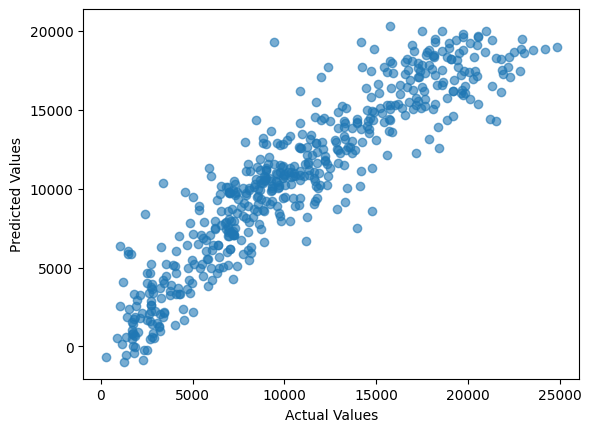

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
